In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-in-csv' dataset.
Path to dataset files: /kaggle/input/mnist-in-csv


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [46]:
path = "/kaggle/input/mnist-in-csv"

In [47]:
df_train = pd.read_csv(path + "/mnist_train.csv")
df_test = pd.read_csv(path + "/mnist_test.csv")

In [48]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [52]:
X_train = df_train.drop('label', axis=1).values
X_test = df_test.drop('label', axis=1).values

In [53]:
y_train = df_train['label'].values
y_test = df_test['label'].values

In [54]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [55]:
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [56]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [57]:
perceptron = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

In [58]:
perceptron.compile(optimizer='sgd',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [59]:
history_percp = perceptron.fit(X_train_img, y_train_cat,
                               epochs=5,
                               batch_size=32,
                               validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7191 - loss: 1.1257 - val_accuracy: 0.8839 - val_loss: 0.4796
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8772 - loss: 0.4767 - val_accuracy: 0.8967 - val_loss: 0.4005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8893 - loss: 0.4094 - val_accuracy: 0.9029 - val_loss: 0.3678
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8963 - loss: 0.3811 - val_accuracy: 0.9071 - val_loss: 0.3486
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8993 - loss: 0.3668 - val_accuracy: 0.9101 - val_loss: 0.3358


In [60]:
loss, acc = perceptron.evaluate(X_test_img, y_test_cat)
print("Loss:", loss)
print("Accuracy:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.3848
Loss: 0.33584749698638916
Accuracy: 0.910099983215332


In [61]:
#ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [62]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [63]:
history_ann = ann.fit(X_train_img, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8843 - loss: 0.4072 - val_accuracy: 0.9624 - val_loss: 0.1254
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9681 - loss: 0.1034 - val_accuracy: 0.9723 - val_loss: 0.0915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9787 - loss: 0.0704 - val_accuracy: 0.9747 - val_loss: 0.0791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0506 - val_accuracy: 0.9750 - val_loss: 0.0848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9755 - val_loss: 0.0802
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0246 - val_accuracy: 0.9792 - val_loss: 0.0780
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0195 - 

In [64]:

acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc_ann

0.9728999733924866

In [65]:
X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [66]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [67]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [68]:
history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8634 - loss: 0.4286 - val_accuracy: 0.9864 - val_loss: 0.0422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0798 - val_accuracy: 0.9893 - val_loss: 0.0318
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0602 - val_accuracy: 0.9888 - val_loss: 0.0320
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0467 - val_accuracy: 0.9907 - val_loss: 0.0267
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0393 - val_accuracy: 0.9916 - val_loss: 0.0262


In [69]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=1)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0333


In [70]:
acc_cnn

0.991599977016449

In [71]:
def plot_training(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.legend()
    plt.show()

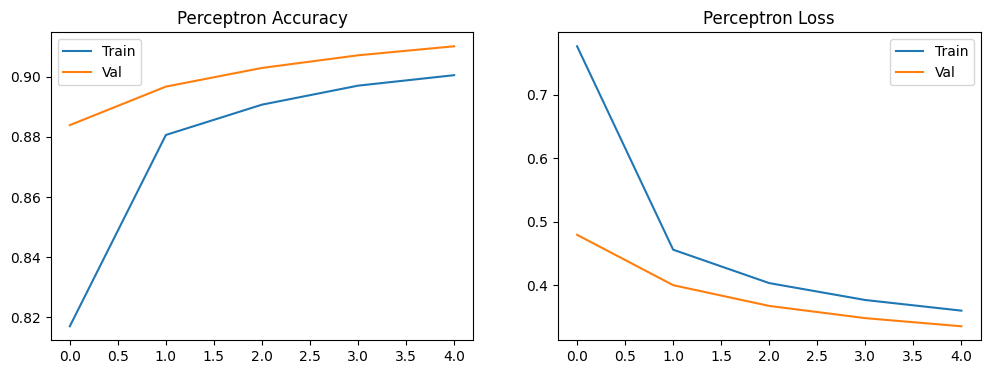

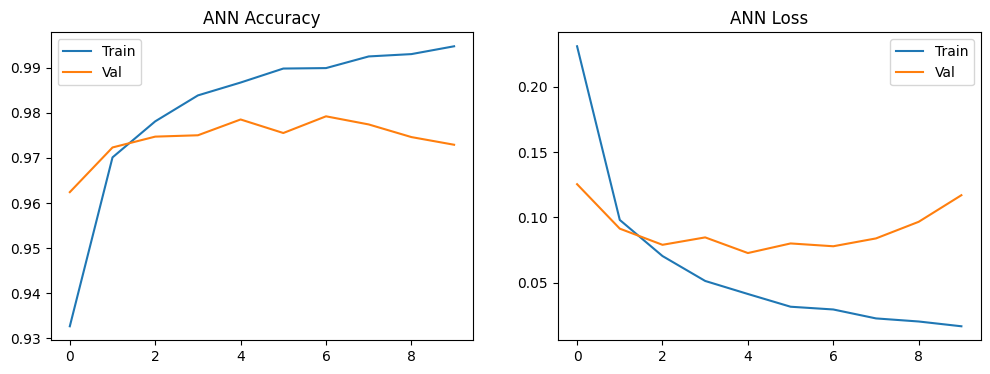

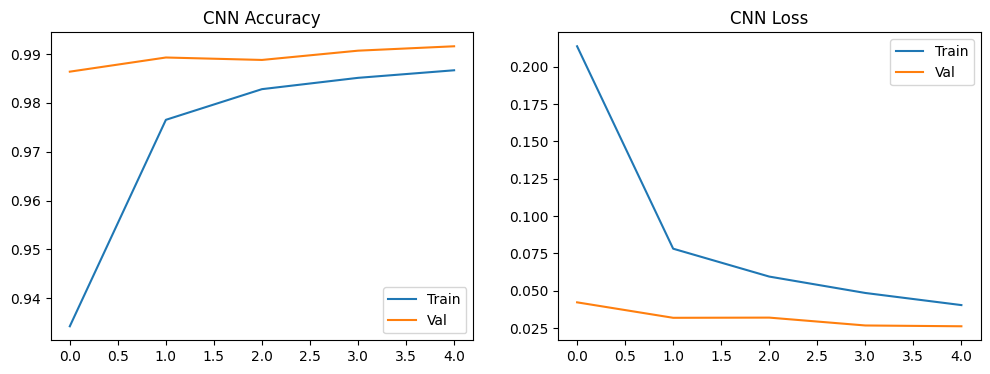

In [72]:
plot_training(history_percp, "Perceptron")
plot_training(history_ann, "ANN")
plot_training(history_cnn, "CNN")

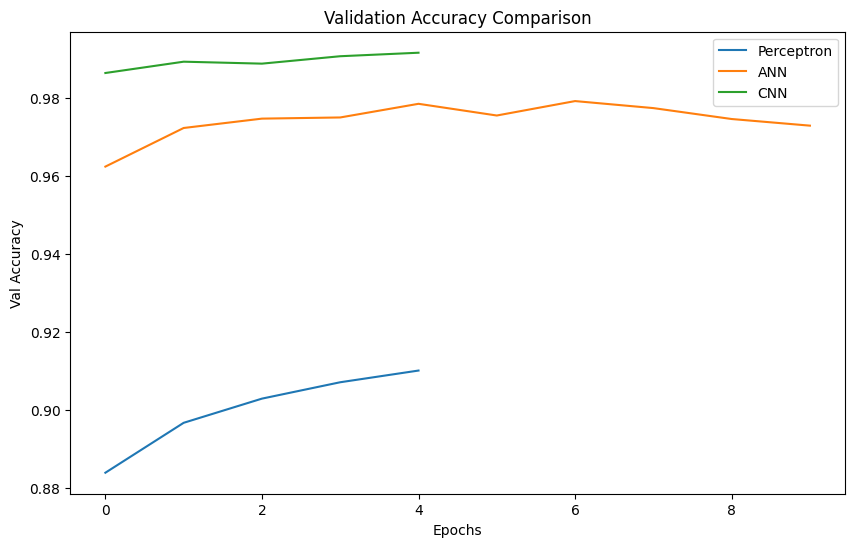

In [73]:
plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

In [74]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


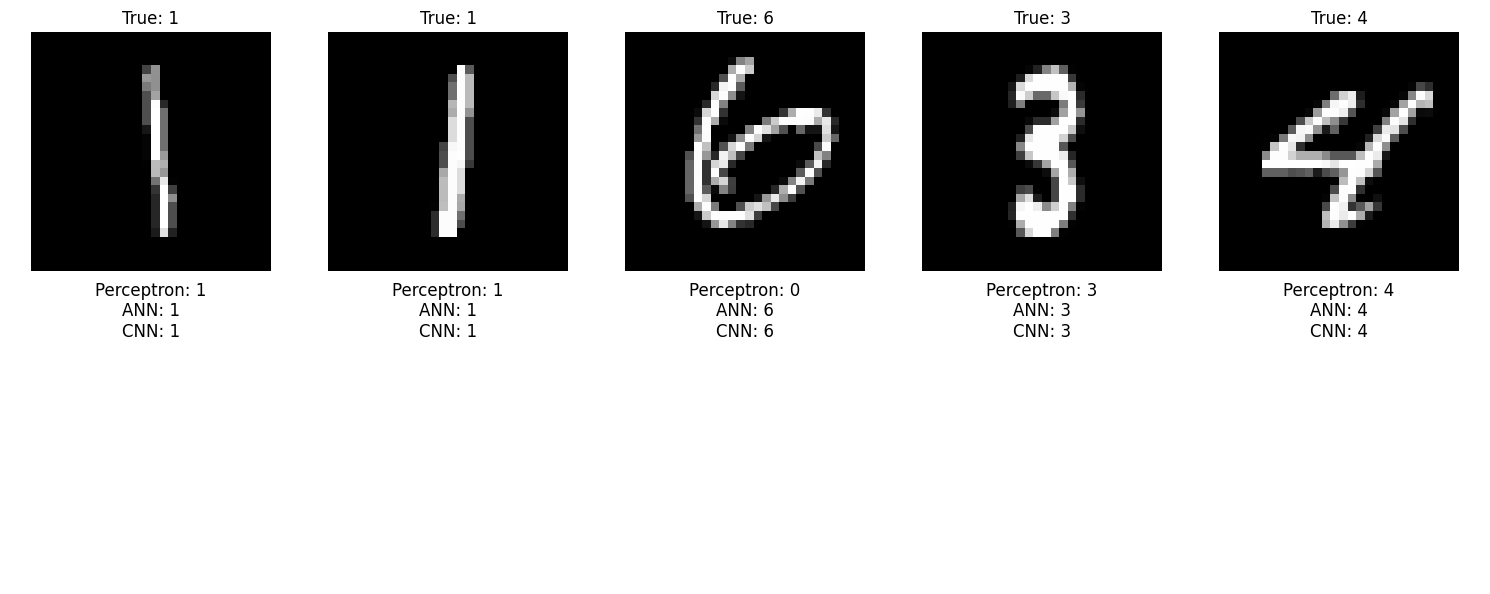

In [75]:
show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


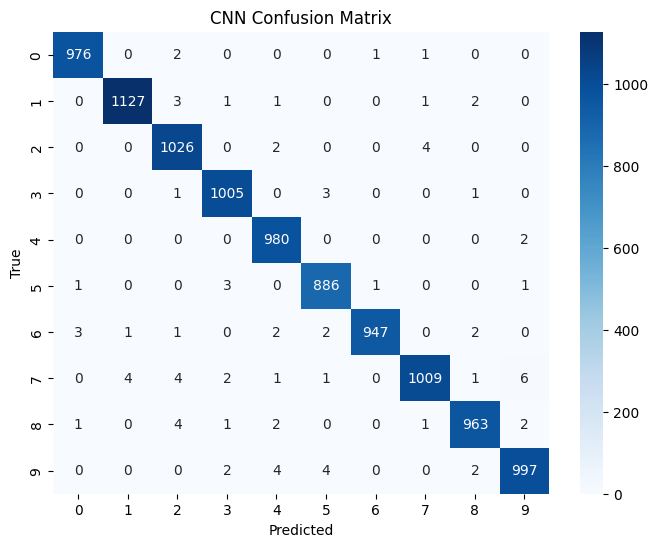

In [76]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

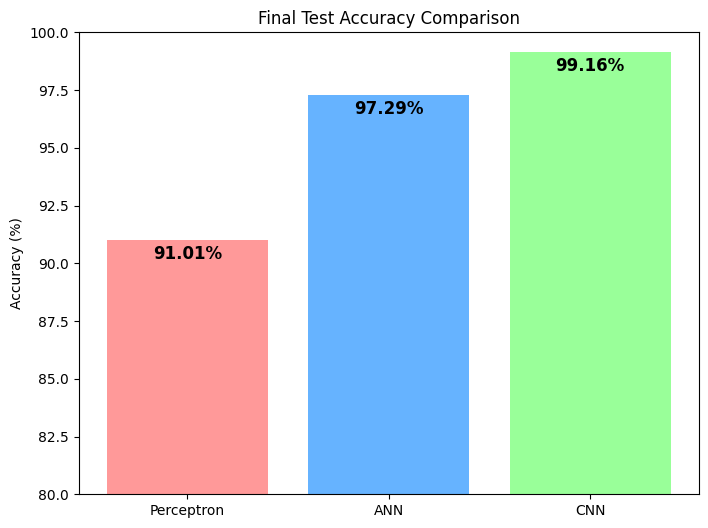

In [77]:
final_accs = [acc*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()